In [21]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from tools.config import opt
from lib.VGG16.faster_rcnn_vgg16 import FasterRCNNVGG16
from lib.cascade.trainer import FasterRCNNTrainer
from tools.util import  read_image
from tools.vis_tool import vis_bbox, predict
from tools import array_tool as at
from IPython.core.debugger import Tracer
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
img = read_image('data/1.jpg')
img = t.from_numpy(img)[None]

In [4]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

In [5]:
trainer.load('/home/wrc/fasterrcnn_0.712.pth')

FasterRCNNTrainer(
  (faster_rcnn): FasterRCNNVGG16(
    (extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace)
      (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace)
      (16)

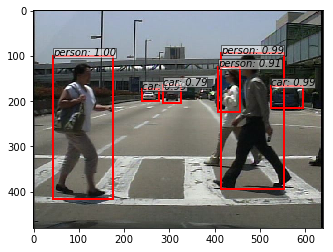

In [38]:
#_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img, visualize=True)
_bboxes, _labels, _scores = predict(img, model=trainer.faster_rcnn, specific_label=['person'])
vis_bbox(at.tonumpy(img[0]),
         _bboxes[0],
         _labels[0],
         _scores[0])